In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df1 = pd.read_csv("SP5001.csv")
df2 = pd.read_csv("SP5002.csv")
df3 = pd.read_csv("SP5003.csv")

In [3]:
print("DF1 : ", df1.shape)
print("DF2 : ", df2.shape)
print("DF3 : ", df3.shape)

DF1 :  (15120, 7)
DF2 :  (190, 7)
DF3 :  (119, 7)


In [4]:
df = pd.concat([df1,df2,df3])

In [5]:
df.shape

(15429, 7)

In [6]:
df.head()

,Adj Close,Close,Date,High,Low,Open,Volume
0,2343.979980,2343.979980,2017-03-24,2356.219971,2335.739990,2350.419922,2975130000
1,2345.959961,2345.959961,2017-03-23,2358.919922,2342.129883,2345.969971,3260600000
2,2348.449951,2348.449951,2017-03-22,2351.810059,2336.449951,2343.000000,3572730000
3,2344.020020,2344.020020,2017-03-21,2381.929932,2341.899902,2379.320068,4265590000
4,2373.469971,2373.469971,2017-03-20,2379.550049,2369.659912,2378.239990,3054930000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15429 entries, 0 to 118
Data columns (total 7 columns):
Adj Close    15429 non-null float64
Close        15429 non-null float64
Date         15429 non-null object
High         15429 non-null float64
Low          15429 non-null float64
Open         15429 non-null float64
Volume       15429 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 964.3+ KB


In [8]:
df.loc[:,"Date"] = df.loc[:,"Date"].astype("datetime64")

C:\Users\Rajiv\Anaconda3\lib\site-packages\pandas\core\internals.py:3224: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


In [9]:
df.set_index("Date", inplace=True)

In [10]:
df.sort_index(inplace=True)

In [11]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000,1.542900e+04
mean,612.084211,612.084211,615.598410,608.079071,611.940726,1.004063e+09
std,660.465065,660.465065,663.678188,656.751411,660.353472,1.588156e+09
min,38.980000,38.980000,38.980000,38.980000,38.980000,1.260000e+06
25%,95.940002,95.940002,96.690002,95.080002,95.940002,1.452000e+07
50%,269.040009,269.040009,270.399994,267.420013,268.989990,1.460900e+08
75%,1129.439941,1129.439941,1137.469971,1122.270020,1129.300049,1.373300e+09
max,2872.870117,2872.870117,2872.870117,2851.479980,2867.229980,1.145623e+10


In [12]:
start = df.index.min()
end = df.index.max()

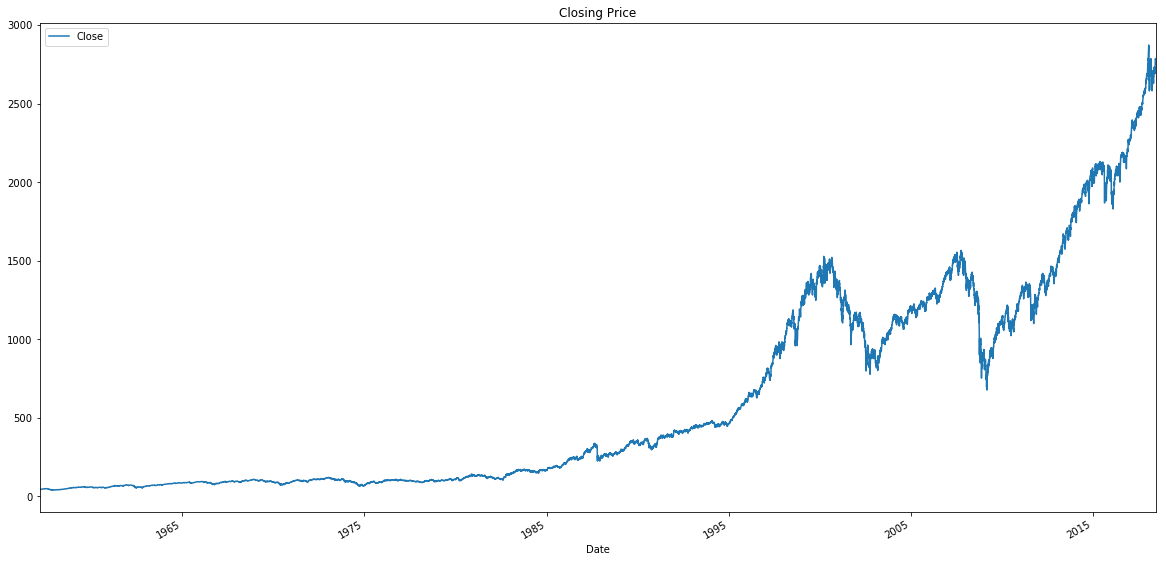

In [13]:
plt.clf()
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(1,1,1)
ax.set_title("Closing Price")

df.plot(x=df.index, y='Close', ax=ax)
plt.show()

In [14]:
roi = [0.00]
for i in range(1,len(df)):
    curr_close = df.iloc[i,1]
    prev_close = df.iloc[i-1,1]
    ret = (prev_close - curr_close)/prev_close
    roi.append(ret)    

In [15]:
df["DailyROI"] = roi

In [16]:
df["DailyROI"].describe()

count    15429.000000
mean        -0.000317
std          0.009838
min         -0.115800
25%         -0.004984
50%         -0.000433
75%          0.004130
max          0.204669
Name: DailyROI, dtype: float64

In [17]:
df.head()

,Adj Close,Close,High,Low,Open,Volume,DailyROI
Date,,,,,,,
1957-03-04,44.060001,44.060001,44.060001,44.060001,44.060001,1890000,0.000000
1957-03-05,44.220001,44.220001,44.220001,44.220001,44.220001,1860000,-0.003631
1957-03-06,44.230000,44.230000,44.230000,44.230000,44.230000,1840000,-0.000226
1957-03-07,44.209999,44.209999,44.209999,44.209999,44.209999,1830000,0.000452
1957-03-08,44.070000,44.070000,44.070000,44.070000,44.070000,1630000,0.003167


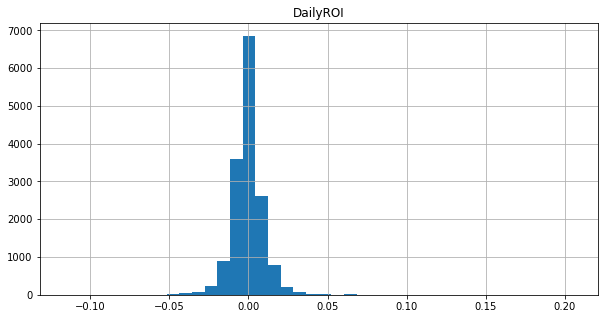

In [18]:
plt.figure(figsize=(20,20))
df.hist(column="DailyROI", bins=40, figsize=(10,5))
plt.show()

In [19]:
pd.value_counts(df.loc[((df["DailyROI"] >= -0.05) & (df["DailyROI"] <= 0.05)),"DailyROI"],bins=20, sort=False)

(-0.0504, -0.0443]         10
(-0.0443, -0.0394]         19
(-0.0394, -0.0345]         28
(-0.0345, -0.0296]         31
(-0.0296, -0.0246]         82
(-0.0246, -0.0197]        176
(-0.0197, -0.0148]        407
(-0.0148, -0.00987]       924
(-0.00987, -0.00494]     2202
(-0.00494, -1.93e-05]    4248
(-1.93e-05, 0.0049]      3826
(0.0049, 0.00983]        1851
(0.00983, 0.0148]         838
(0.0148, 0.0197]          409
(0.0197, 0.0246]          171
(0.0246, 0.0295]           85
(0.0295, 0.0344]           41
(0.0344, 0.0394]           21
(0.0394, 0.0443]           12
(0.0443, 0.0492]            9
Name: DailyROI, dtype: int64

In [20]:
df["year_month"] = df.index.map(lambda x: str(x.year) + "-" + str(x.month))

In [21]:
df.head()

,Adj Close,Close,High,Low,Open,Volume,DailyROI,year_month
Date,,,,,,,,
1957-03-04,44.060001,44.060001,44.060001,44.060001,44.060001,1890000,0.000000,1957-3
1957-03-05,44.220001,44.220001,44.220001,44.220001,44.220001,1860000,-0.003631,1957-3
1957-03-06,44.230000,44.230000,44.230000,44.230000,44.230000,1840000,-0.000226,1957-3
1957-03-07,44.209999,44.209999,44.209999,44.209999,44.209999,1830000,0.000452,1957-3
1957-03-08,44.070000,44.070000,44.070000,44.070000,44.070000,1630000,0.003167,1957-3


In [22]:
monthly_stats = pd.DataFrame(index=pd.unique(df.loc[:,"year_month"]))

In [23]:
monthly_stats.head()

""
1957-3
1957-4
1957-5
1957-6
1957-7


In [24]:
dftemp = df.loc[:,["Close", "year_month"]]

In [25]:
dftemp.head()

,Close,year_month
Date,,
1957-03-04,44.060001,1957-3
1957-03-05,44.220001,1957-3
1957-03-06,44.230000,1957-3
1957-03-07,44.209999,1957-3
1957-03-08,44.070000,1957-3


In [26]:
dftemp.set_index('year_month', inplace=True)

In [27]:
dftemp.head()

,Close
year_month,
1957-3,44.060001
1957-3,44.220001
1957-3,44.230000
1957-3,44.209999
1957-3,44.070000


In [28]:
groupvar = dftemp.loc[:,"Close"].groupby("year_month")

In [29]:
monthly_stats["average"] = groupvar.mean()

In [30]:
monthly_stats["stdev"] = groupvar.std()

In [31]:
monthly_stats["max"] = groupvar.max()
monthly_stats["min"] = groupvar.min()
monthly_stats["median"] = groupvar.median()

In [32]:
monthly_stats.head()

,average,stdev,max,min,median
1957-3,44.040500,0.138772,44.230000,43.750000,44.065000
1957-4,45.047143,0.511118,45.740002,44.139999,44.980000
1957-5,46.779546,0.429656,47.430000,46.020000,46.805000
1957-6,47.599000,0.430507,48.240002,46.779999,47.575001
1957-7,48.516819,0.446120,49.130001,47.430000,48.580002


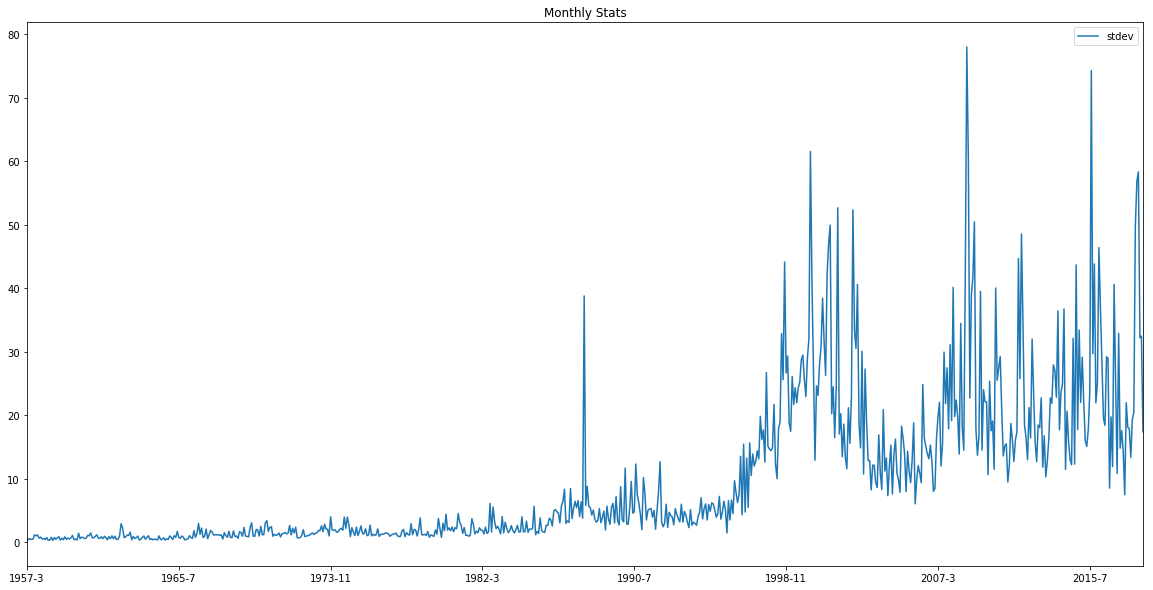

In [33]:
plt.clf()
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(1,1,1)
ax.set_title("Monthly Stats")

monthly_stats.plot(x=monthly_stats.index, y="stdev", ax=ax)

plt.show()

In [34]:
monthly_stats.shape

(736, 5)

In [35]:
#limits = np.linspace(0,736,23,dtype=int)
limits = np.arange(0,736,12,dtype=int)
limits

array([  0,  12,  24,  36,  48,  60,  72,  84,  96, 108, 120, 132, 144,
       156, 168, 180, 192, 204, 216, 228, 240, 252, 264, 276, 288, 300,
       312, 324, 336, 348, 360, 372, 384, 396, 408, 420, 432, 444, 456,
       468, 480, 492, 504, 516, 528, 540, 552, 564, 576, 588, 600, 612,
       624, 636, 648, 660, 672, 684, 696, 708, 720, 732])

In [36]:
limits[61] = 736

In [37]:
#plt.clf()
#fig = plt.figure(figsize=(20,100))

#for i in range(0,40):
#    ax = plt.subplot(20,2,i+1)
#    monthly_stats.iloc[limits[i]+1:limits[i+1],1].plot()

#plt.savefig("plot1.png")
    
#plt.show()

In [38]:
#plt.clf()
#fig = plt.figure(figsize=(20,100))

#for i in range(41,61):
#    ax = plt.subplot(10,2,i-40)
#    monthly_stats.iloc[limits[i]+1:limits[i+1],1].plot()
    

#plt.savefig("plot2.png")    
#plt.show()

In [39]:
pd.value_counts(monthly_stats.loc[:,"stdev"],bins=20, sort=False)

(0.0599, 4.034]     390
(4.034, 7.929]       77
(7.929, 11.823]      36
(11.823, 15.718]     62
(15.718, 19.613]     48
(19.613, 23.508]     34
(23.508, 27.403]     25
(27.403, 31.298]     19
(31.298, 35.193]     12
(35.193, 39.088]      6
(39.088, 42.983]      9
(42.983, 46.877]      5
(46.877, 50.772]      5
(50.772, 54.667]      2
(54.667, 58.562]      2
(58.562, 62.457]      2
(62.457, 66.352]      0
(66.352, 70.247]      0
(70.247, 74.142]      0
(74.142, 78.037]      2
Name: stdev, dtype: int64

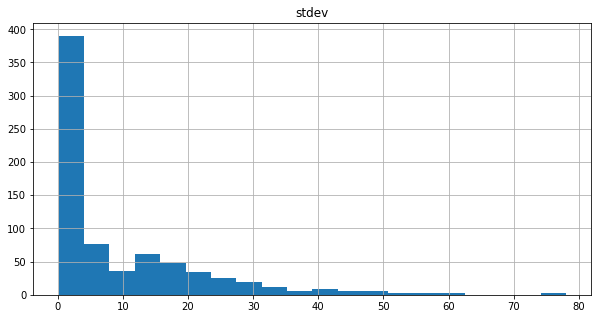

In [40]:
plt.clf()
monthly_stats.hist(column="stdev", bins=20, figsize=(10,5))
plt.show()

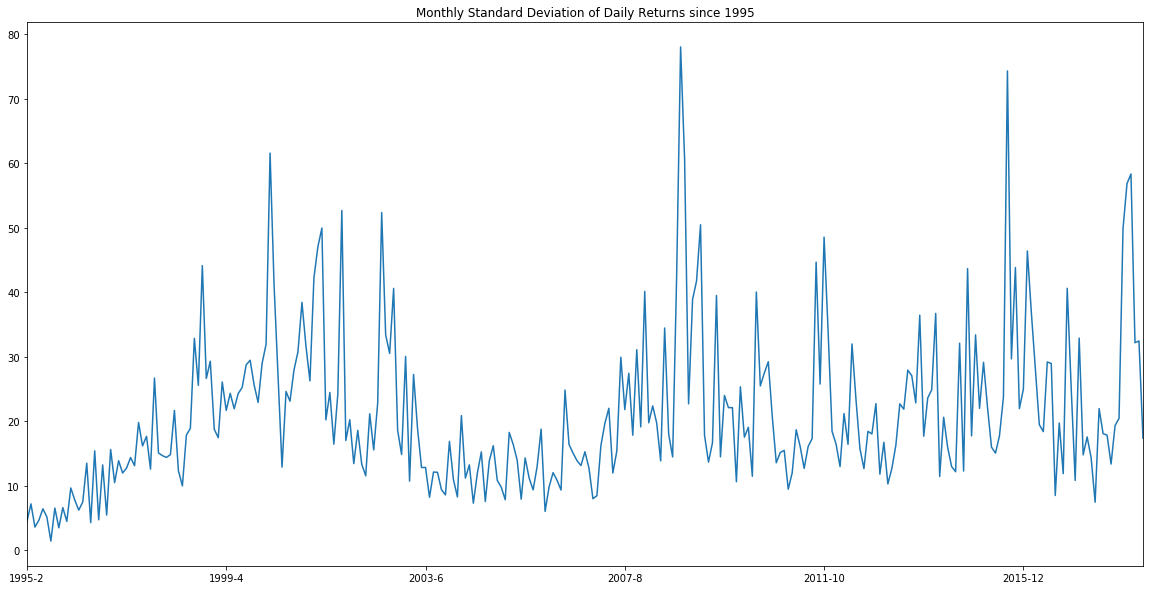

In [41]:
plt.clf()
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(1,1,1)
ax.set_title("Monthly Standard Deviation of Daily Returns since 1995")

monthly_stats.loc[monthly_stats.index>"1995-1","stdev"].plot()

plt.show()

In [42]:
monthly_stats["range"] = monthly_stats.loc[:,"max"] - monthly_stats.loc[:,"min"]

In [43]:
monthly_stats.head()

,average,stdev,max,min,median,range
1957-3,44.040500,0.138772,44.230000,43.750000,44.065000,0.480000
1957-4,45.047143,0.511118,45.740002,44.139999,44.980000,1.600003
1957-5,46.779546,0.429656,47.430000,46.020000,46.805000,1.410000
1957-6,47.599000,0.430507,48.240002,46.779999,47.575001,1.460003
1957-7,48.516819,0.446120,49.130001,47.430000,48.580002,1.700001


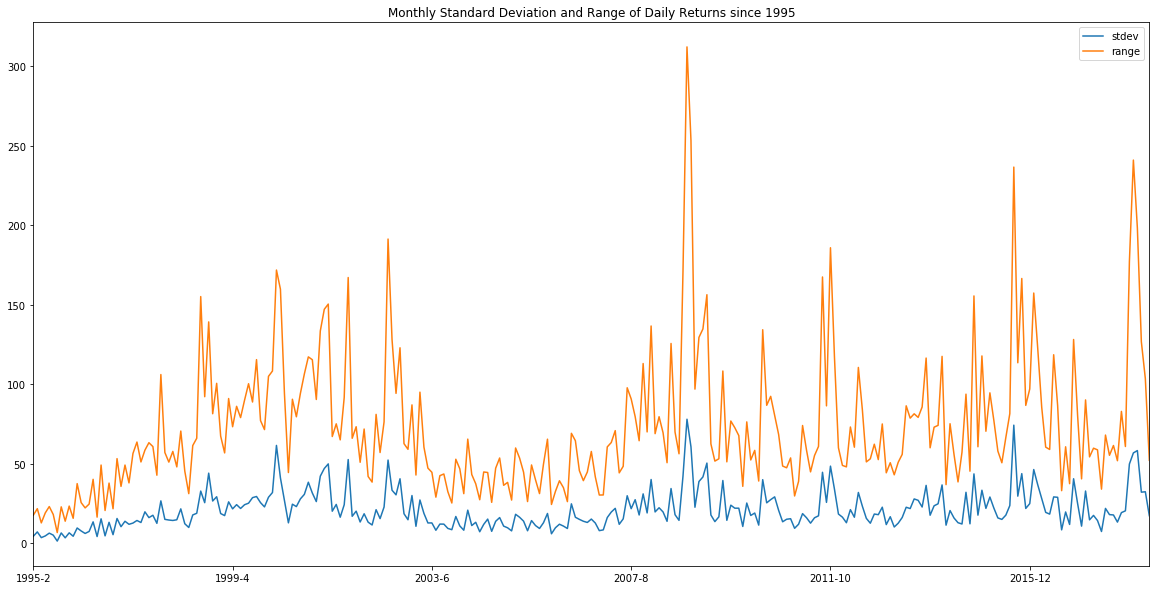

In [44]:
plt.clf()
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(1,1,1)
ax.set_title("Monthly Standard Deviation and Range of Daily Returns since 1995")

monthly_stats.loc[monthly_stats.index>"1995-1",["stdev","range"]].plot(ax=ax)

plt.show()

In [46]:
df["monthly_max"] = df.loc[:,"year_month"].map(lambda x: monthly_stats.loc[x,"max"])

In [47]:
df["monthly_min"] = df.loc[:,"year_month"].map(lambda x: monthly_stats.loc[x,"min"])

In [48]:
df.head()

,Adj Close,Close,High,Low,Open,Volume,DailyROI,year_month,monthly_max,monthly_min
Date,,,,,,,,,,
1957-03-04,44.060001,44.060001,44.060001,44.060001,44.060001,1890000,0.000000,1957-3,44.23,43.75
1957-03-05,44.220001,44.220001,44.220001,44.220001,44.220001,1860000,-0.003631,1957-3,44.23,43.75
1957-03-06,44.230000,44.230000,44.230000,44.230000,44.230000,1840000,-0.000226,1957-3,44.23,43.75
1957-03-07,44.209999,44.209999,44.209999,44.209999,44.209999,1830000,0.000452,1957-3,44.23,43.75
1957-03-08,44.070000,44.070000,44.070000,44.070000,44.070000,1630000,0.003167,1957-3,44.23,43.75


In [61]:
df.loc[:,"Close_scaled"] = (df.loc[:,"Close"] - df.loc[:,"monthly_min"])/(df.loc[:,"monthly_max"] - df.loc[:,"monthly_min"])

In [50]:
df.head()

,Adj Close,Close,High,Low,Open,Volume,DailyROI,year_month,monthly_max,monthly_min,Close_scaled
Date,,,,,,,,,,,
1957-03-04,44.060001,44.060001,44.060001,44.060001,44.060001,1890000,0.000000,1957-3,44.23,43.75,0.354165
1957-03-05,44.220001,44.220001,44.220001,44.220001,44.220001,1860000,-0.003631,1957-3,44.23,43.75,0.020831
1957-03-06,44.230000,44.230000,44.230000,44.230000,44.230000,1840000,-0.000226,1957-3,44.23,43.75,0.000000
1957-03-07,44.209999,44.209999,44.209999,44.209999,44.209999,1830000,0.000452,1957-3,44.23,43.75,0.041669
1957-03-08,44.070000,44.070000,44.070000,44.070000,44.070000,1630000,0.003167,1957-3,44.23,43.75,0.333333


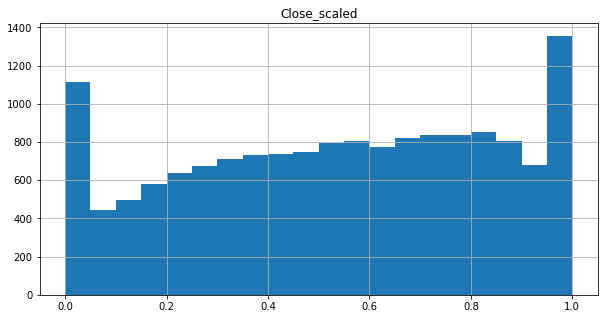

In [62]:
plt.clf()
df.hist(column="Close_scaled", bins=20, figsize=(10,5))
plt.show()

In [55]:
df["year"] = df.index.year

In [60]:
df.head(20)

,Adj Close,Close,High,Low,Open,Volume,DailyROI,year_month,monthly_max,monthly_min,Close_scaled,year
Date,,,,,,,,,,,,
1957-03-04,44.060001,44.060001,44.060001,44.060001,44.060001,1890000,0.000000,1957-3,44.23,43.75,0.354165,1957
1957-03-05,44.220001,44.220001,44.220001,44.220001,44.220001,1860000,-0.003631,1957-3,44.23,43.75,0.020831,1957
1957-03-06,44.230000,44.230000,44.230000,44.230000,44.230000,1840000,-0.000226,1957-3,44.23,43.75,0.000000,1957
1957-03-07,44.209999,44.209999,44.209999,44.209999,44.209999,1830000,0.000452,1957-3,44.23,43.75,0.041669,1957
1957-03-08,44.070000,44.070000,44.070000,44.070000,44.070000,1630000,0.003167,1957-3,44.23,43.75,0.333333,1957
1957-03-11,43.779999,43.779999,43.779999,43.779999,43.779999,1650000,0.006580,1957-3,44.23,43.75,0.937502,1957
1957-03-12,43.750000,43.750000,43.750000,43.750000,43.750000,1600000,0.000685,1957-3,44.23,43.75,1.000000,1957
1957-03-13,44.040001,44.040001,44.040001,44.040001,44.040001,1840000,-0.006629,1957-3,44.23,43.75,0.395831,1957
1957-03-14,44.070000,44.070000,44.070000,44.070000,44.070000,1580000,-0.000681,1957-3,44.23,43.75,0.333333,1957


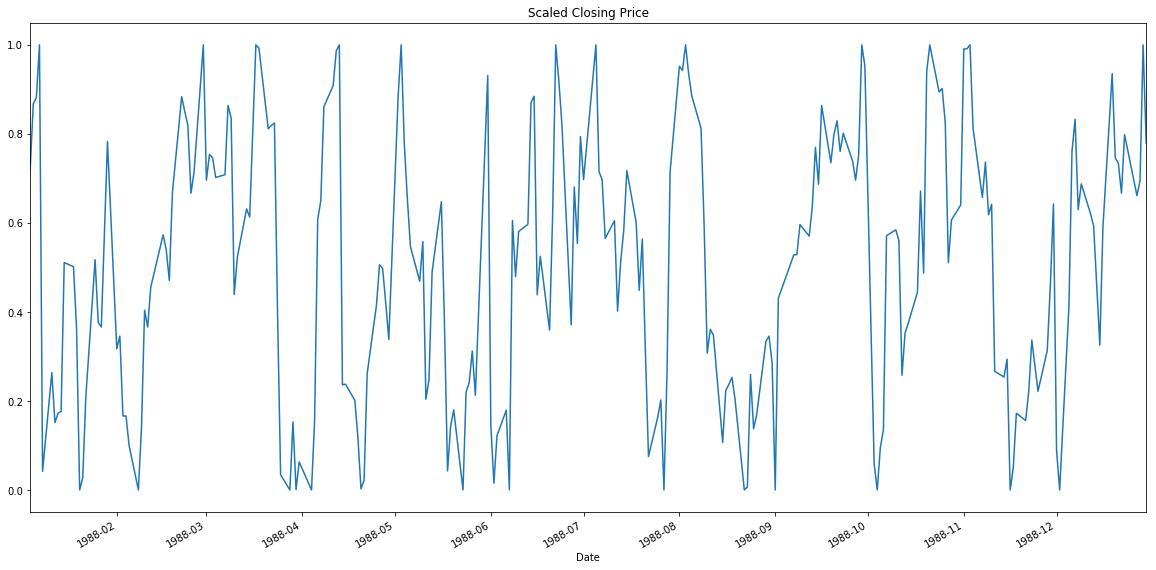

In [64]:
plt.clf()
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(1,1,1)
ax.set_title("Scaled Closing Price")

df.loc[df["year"] == 1988,'Close_scaled'].plot(ax=ax)
plt.show()